# Synthetic Data Training with the Yolov5 Object Detection model
* In this study, synthetic data training was carried out using the object detection model Yolov5.
* **Synthetic Data** is a virtual recreation of real world data. It can be used to train Synthetic Computer Vision (SCV) models to detect real world objects.



## Setup

In [ ]:
#clone YOLOv5 
!git clone https://github.com/ultralytics/yolov5  
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 15305, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 15305 (delta 0), reused 3 (delta 0), pack-reused 15300
Receiving objects: 100% (15305/15305), 14.19 MiB | 10.87 MiB/s, done.
Resolving deltas: 100% (10493/10493), done.
/kaggle/working/yolov5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask-cudf 21.12.2 requires cupy-cuda115, which is not installed.
cudf 21.12.2 requires cupy-cuda115, which is not installed.
tensorflow 2.11.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
tensorflow-transform 1.12.0 requires pyarrow<7,>=6, but you have pyarrow 5.0.0 which is incompatible.
tensorflow-serving-api 2.11.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
librosa 0.10.0 req

In [ ]:
# set up environment
os.environ["DATASET_DIRECTORY"] = "./datasets"

## Load Dataset from Roboflow
* Before training, the dataset consisting of images must be converted into a format that Yolo can understand for training. The first of these is to annotate each data, that is, to mark it, and then it is necessary to divide the dataset into 3 categories as **Train, Validation, Testing**. Here is the Roboflow plotfrom that fulfills just these requirements. 
* **Roboflow** is a tool that facilitates the task of computer vision in the field of deep learning. It allows developers to create computer vision applications, whatever their skills or experience. Supports object detection and classification models. Roboflow can do the following
  1. Dataset annotation
  2. Dataset Preprocessing
  3. Merge Project/Datasets
  4. Dataset Health check
  5. Dataset Export
  6. Train the model
* **Dataset** [SynteticData](https://universe.roboflow.com/pavel-dwoqb/ms-wucvn/dataset/2/images/?split=train)

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key=" ") # write your own roboflow api key
project = rf.workspace("pavel-dwoqb").project("ms-wucvn")
dataset = project.version(2).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to /kaggle/working/datasets/Ms-2 in yolov5pytorch:: 100%|██████████| 3002/3002 [00:01<00:00, 2427.31it/s]


## Training

In [ ]:
!python train.py --img 416 --batch 16 --epochs 120 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=yolov5s.pt, cfg=, data=/kaggle/working/datasets/Ms-2/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=120, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with ht

## Prediction

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.2 --source {dataset.location}/test/images

detect: weights=['runs/train/exp/weights/best.pt'], source=/kaggle/working/datasets/Ms-2/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.2, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: YOLOv5 requirement "tqdm>=4.64.0" not found, attempting AutoUpdate...

requirements: 1 package updated per /kaggle/working/yolov5/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 v7.0-120-g3e55763 Python-3.7.12 torch-1.13.0 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/101 /kaggle/working/datasets/Ms-2/test/images/000007_png.rf.36b54ae20c062f282745db9e

## Inference

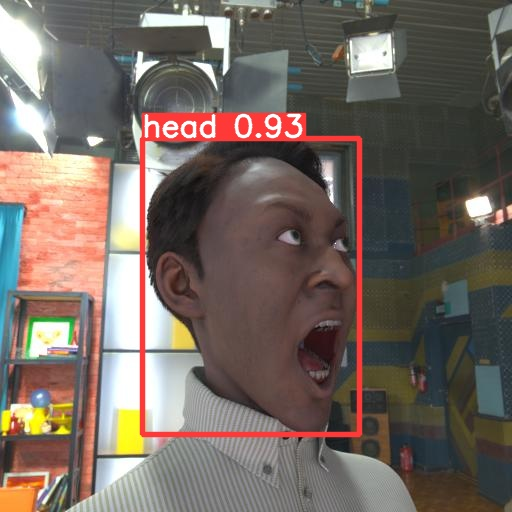

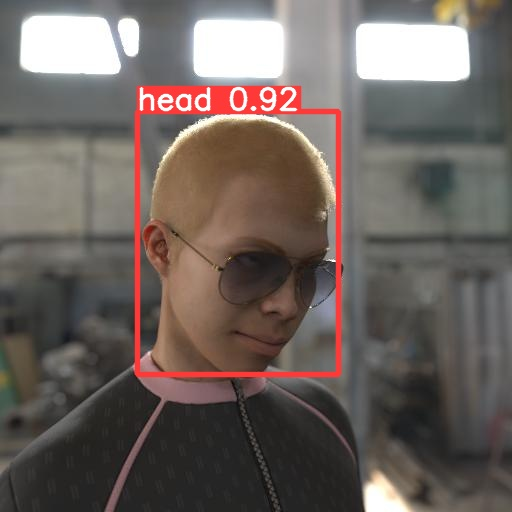

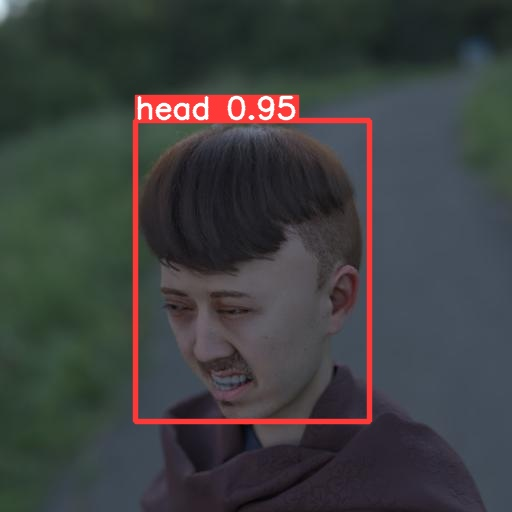

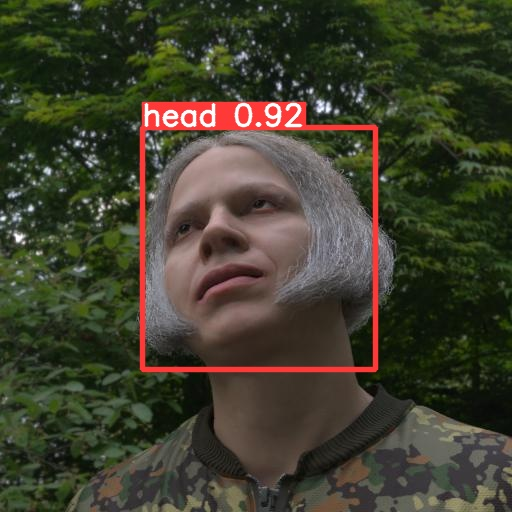

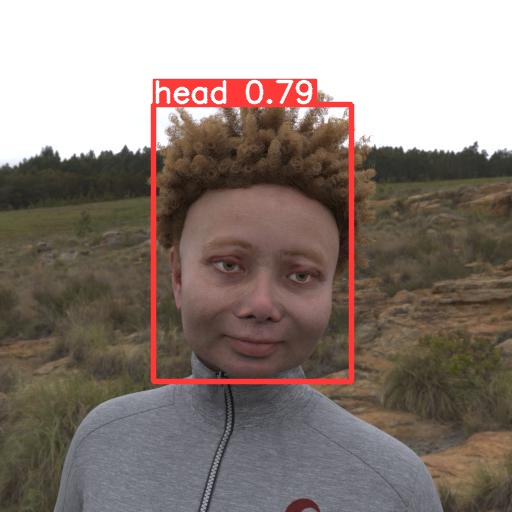

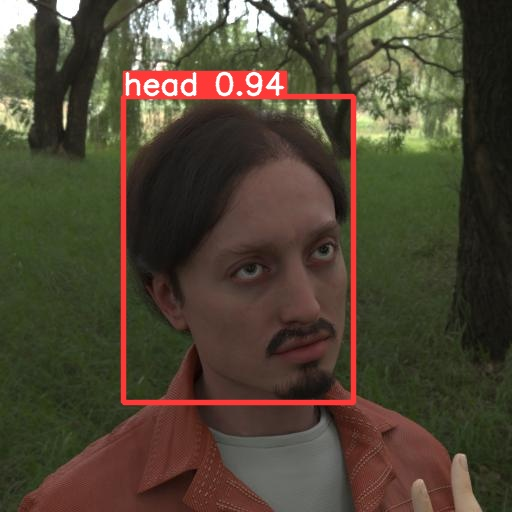

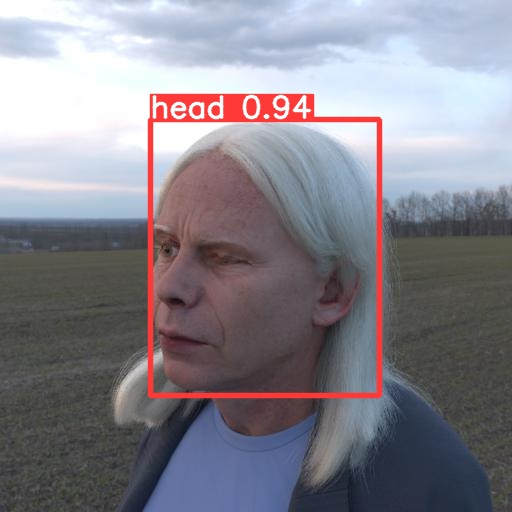

In [ ]:
# display
import glob
from IPython.display import Image, display

i = 0
# doğru exp dosyasını seç 
for imageName in glob.glob('./yolov5/runs/detect/exp/*.jpg'): 
    i += 1

    if i < 8:
      display(Image(filename=imageName))
      print("\n")

## Prediction on Real Data Set 

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.2 --source /content/headimages

detect: weights=['runs/train/exp/weights/best.pt'], source=/kaggle/input/headimages, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.2, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: YOLOv5 requirement "tqdm>=4.64.0" not found, attempting AutoUpdate...

requirements: 1 package updated per /kaggle/working/yolov5/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 v7.0-120-g3e55763 Python-3.7.12 torch-1.13.0 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/5 /kaggle/input/headimages/actor-al-pacino.jpg: 416x320 1 head, 19.6ms
image 2/5 /kaggle/input/headim

## Display Inference from Real Data Set

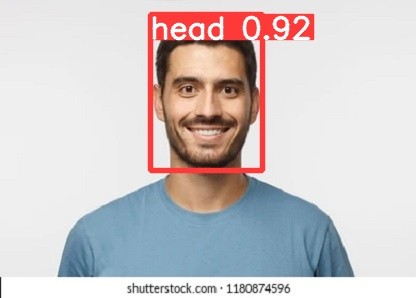

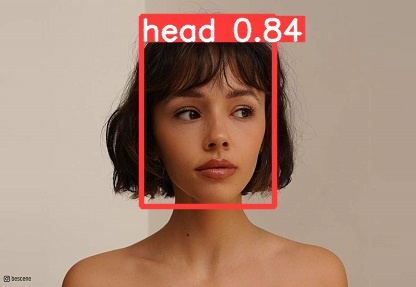

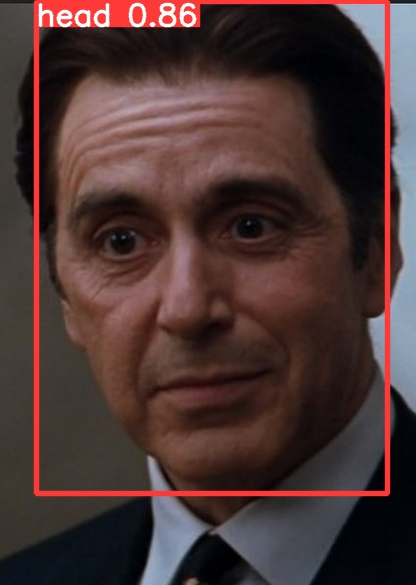

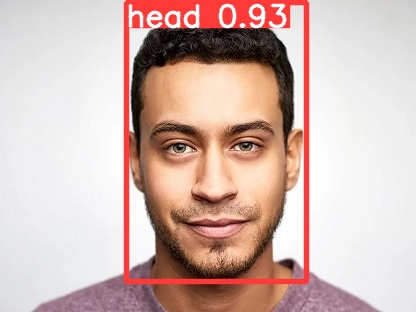

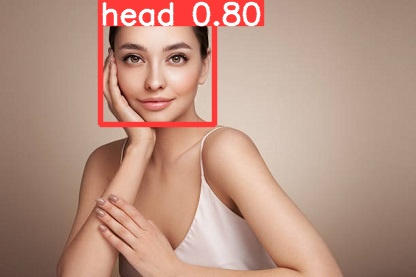

In [ ]:
# display
import glob
from IPython.display import Image, display

i = 0

for imageName in glob.glob('./yolov5/runs/detect/exp2/*.jpg'): 

    if i < 8:
      display(Image(filename=imageName))
      print("\n")

## Conclusion
* In this study, in which synthetic data training was carried out with the Yolov5 object detection model, it was aimed to show how to perform object detection by training synthetic data, and it was aimed to find answers to the desired questions as a result of the study.
1. Impact of synthetic data on objet detection;
     * Data scarcity, poor quality and data duplication is a major problem in developing an object recognition model. To train ML models with real-world data, large amounts of quality datasets are required. Therefore, synthetic data allows them to develop Object detection models,
       helps them obtain effective, inexpensive and usable data.

2. Methods to improve results;
    * Initially, different training and data models were tried to improve the results obtained. These; Synthetic fruit data with 6000 data was trained with yolov5 at 100 epochs, but did not give the desired result when tested with real data.
    * Secondly, the same data set was retrained with the yolov7 training model and the result did not change.
    * The data to be selected on these results should be of high quality, that is, when tested with real data, the desired object must be determined. Considering this, an intensive search for synthetic data was made and the appropriate dataset, the synthetic human head, was found. it was trained with 40 epochs in the first training but the accuracy rate was not high. In the second training, training took place with 120 epochs. The test data detection accuracy rate and the real data detection accuracy rate were recorded almost the same.

3. To develop a model trained with synthetic data;
    * A different training model can be chosen.
    * Quality data may be preferred;
       - Similarity to real data
       - Number of data
       - Correctly annotated etc. 
    * Data augmentation can be done with the data augmentation method.
    * Real world data can be added to the training data.
    * The number of epochs and batches can be changed.
       These can be applied to improve a model.